In [1]:
# DATA SUMMARIES
# Introduction
# 7 min
# Before diving into formal analysis with a dataset, it is often helpful to perform some initial investigations of the data through exploratory data analysis (EDA) to get a better sense of what you will be working with. Basic summary statistics and visualizations are important components of EDA as they allow us to condense a large amount of information into a small set of numbers or graphics that can be easily interpreted.

# This lesson focuses on univariate summaries, where we explore each variable separately. This is useful for answering questions about each individual feature. Variables can typically be classified as quantitative (i.e., numeric) or categorical (i.e., discrete). Depending on its type, we may want to choose different summary metrics and visuals to use.

# Let’s say we have the following dataset on New York City rental listings imported into a pandas DataFrame (subsetted from the StreetEasy dataset):

# import pandas as pd

# # Import dataset
# rentals = pd.read_csv('streeteasy.csv')

# # Preview first 5 rows
# print(rentals.head())

# rent	size_sqft	borough
# 2550	480	Manhattan
# 11500	2000	Manhattan
# 3000	1000	Queens
# 4500	916	Manhattan
# 4795	975	Manhattan
# As seen, we have two quantitative variables (rent and size_sqft) and one categorical variable (borough). The pandas library offers a handy method .describe() for displaying some of the most common summary statistics for the columns in a DataFrame. By default, the result only includes numeric columns, but we can specify include='all' to the method to display categorical ones as well:

# # Display summary statistics for all columns
# print(rentals.describe(include='all'))

# rent	size_sqft	borough
# count	5000.000000	5000.000000	5000
# unique	NaN	NaN	3
# top	NaN	NaN	Manhattan
# freq	NaN	NaN	3539
# mean	4536.920800	920.101400	NaN
# std	2929.838953	440.150464	NaN
# min	1250.000000	250.000000	NaN
# 25%	2750.000000	633.000000	NaN
# 50%	3600.000000	800.000000	NaN
# 75%	5200.000000	1094.000000	NaN
# max	20000.000000	4800.000000	NaN
# This is a great way to get an overview of all the variables in a dataset. Notice how different statistics are displayed depending on the variable type. In the rest of the lesson, we’ll look more closely at the common ways to summarize and visualize quantitative and categorical variables.



In [2]:
import pandas as pd
from scipy.stats import trim_mean, iqr  #, median_absolute_deviation
#from scipy import stats

movies = pd.read_csv('movies.csv')

In [3]:
# Print the first 5 rows 
movies.head()


,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
0,Evan Almighty,175000000.0,100289690.0,1.741313e+08,PG,Comedy
1,Waterworld,175000000.0,88246220.0,2.642462e+08,PG-13,Action
2,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,PG-13,Adventure
3,47 Ronin,175000000.0,38362475.0,1.517168e+08,PG-13,Action
4,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,PG-13,Action


In [4]:

# Print the summary statistics for all columns

movies.describe() ## NOTE: this is different than    :: movies.describe w/o parentheses, will give very different resullts
#movies.describe(  include = 'all' )

,production_budget,domestic_gross,worldwide_gross
count,3.401000e+03,3.401000e+03,3.401000e+03
mean,3.328474e+07,4.542179e+07,9.411512e+07
std,3.489239e+07,5.882566e+07,1.409182e+08
min,2.500000e+05,0.000000e+00,0.000000e+00
25%,9.000000e+06,6.118683e+06,1.061881e+07
50%,2.000000e+07,2.553382e+07,4.015902e+07
75%,4.500000e+07,6.032379e+07,1.176152e+08
max,1.750000e+08,4.745447e+08,1.304866e+09


In [5]:
# DATA SUMMARIES
# Central Tendency for Quantitative Data
# 9 min
# For quantitative variables, we often want to describe the central tendency, or the “typical” value of a variable. For example, what is the typical cost of rent in New York City?

# There are several common measures of central tendency:

# Mean: The average value of the variable, calculated as the sum of all values divided by the number of values.
# Median: The middle value of the variable when sorted.
# Mode: The most frequent value of the variable.
# Trimmed mean: The mean excluding x percent of the lowest and highest data points.
# For our rentals DataFrame with a column named rent that contains rental prices, we can calculate the central tendency statistics listed above as follows:

# # Mean
# rentals.rent.mean()

# # Median
# rentals.rent.median()

# # Mode
# rentals.rent.mode()

# # Trimmed mean
# from scipy.stats import trim_mean
# trim_mean(rentals.rent, proportiontocut=0.1)  # trim extreme 10%


In [6]:
# 1.
# Using the same movies DataFrame from the last exercise, find the mean production_budget for all movies and save it to a variable called mean_budget. Print mean_budget to see the result.

In [7]:
# Save the mean to mean_budget

mean_budget = movies.production_budget.mean()


In [8]:
# Save the median to med_budget

med_budget = movies.production_budget.median()

In [9]:

# Save the mode to mode_budget

mode_budget = movies.production_budget.mode()


In [10]:
# Save the trimmed mean to trmean_budget

trmean_budget = trim_mean(movies.production_budget, proportiontocut=0.1)  # trim extreme 10%

In [11]:
# Spread for Quantitative Data
# 11 min
# The spread of a quantitative variable describes the amount of variability. This is important because it provides context for measures of central tendency. For example, if there is a lot of variability in New York City rent prices, we can be less certain that the mean or median price is representative of what the typical rent is.

# There are several common measures of spread:

# Range: The difference between the maximum and minimum values of a variable.
# Interquartile range (IQR): The difference between the 75th and 25th percentile values.
# Variance: The average of the squared distance from each data point to the mean.
# Standard deviation (SD): The square root of the variance.
# Mean absolute deviation (MAD): The mean absolute value of the distance between each data point and the mean.
# For our rentals DataFrame, we can calculate the spread for the rent column as follows:

# # Range
# rentals.rent.max() - rentals.rent.min()

# # Interquartile range
# rentals.rent.quantile(0.75) - rentals.rent.quantile(0.25)

# from scipy.stats import iqr
# iqr(rentals.rent)  # alternative way

# # Variance
# rentals.rent.var()

# # Standard deviation
# rentals.rent.std()

# # Mean absolute deviation
# rentals.rent.mad()


In [12]:
# Using the movies DataFrame, find the range for production_budget and save it to a variable called range_budget. Print range_budget to see the result.

#movies.head()

movies.production_budget.max()
movies.production_budget.min()

range_budget = movies.production_budget.max()  - movies.production_budget.min()
print(range_budget)

174750000.0


In [13]:
# Save the interquartile range for budget to a variable called iqr_budget and print the result.

movies.production_budget.quantile(.75)
movies.production_budget.quantile(.25)

iqr_budget = movies.production_budget.quantile(.75) - movies.production_budget.quantile(.25) 

# check work with alternate method

print(iqr_budget)
iqr( movies.production_budget ) # check!


36000000.0


36000000.0

In [14]:
# Save the variance to a variable called var_budget and print the result.

var_budget = movies.production_budget.var()
print(var_budget)

1217478921139135.5


In [15]:
# Save the standard deviation to a variable called std_budget and print the result.

std_budget = movies.production_budget.std()
print(std_budget)

#check against variance
std_budget * std_budget  # check!

34892390.59077402


1217478921139135.5

In [16]:
# Save the mean absolute deviation to mad_budget and print result

#movies.production_budget.mad()  ## pandas mad() no longer works. Deprecated per doc.

#stats.median_absolute_deviation()
# stats.median_absolute_deviation(movies.production_budget, scale=1)


### GOT THIS METHOD FROM pandas github; check against codecademy instance which still supports mad() ::: 26090426.818845242

abs(movies.production_budget - movies.production_budget.mean()).mean() # check!!



26090426.818845242

In [17]:
# DATA SUMMARIES
# Visualizing Quantitative Variables
# 8 min
# While summary statistics are certainly helpful for exploring and quantifying a feature, we might find it hard to wrap our minds around a bunch of numbers. This is why data visualization is such a powerful element of EDA.

# For quantitative variables, boxplots and histograms are two common visualizations. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (e.g., skew or multimodality).

# Python’s seaborn library, built on top of matplotlib, offers the boxplot() and histplot() functions to easily plot data from a pandas DataFrame:

# import matplotlib.pyplot as plt 
# import seaborn as sns

# # Boxplot for rent
# sns.boxplot(x='rent', data=rentals)
# plt.show()
# plt.close()

# boxplot of rent

# # Histogram for rent
# sns.histplot(x='rent', data=rentals)
# plt.show()
# plt.close()

# histogram of rent

# Instructions
# Checkpoint 1 Enabled
# 1.
# Using the movies DataFrame, create a boxplot for production_budget using the boxplot() function from seaborn. Don’t forget to display the plot using plt.show() and close the plot using plt.close().

# Checkpoint 2 Step instruction is unavailable until previous steps are completed
# 2.
# Create a histogram for production_budget using the histplot() function from seaborn.

# From the plots, what do you notice about the distribution of movie budgets?

# Community Forums
# Still have questions? View this exercise's thread in the Codecademy Forums.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
movies
movies.head(30)

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
0,Evan Almighty,175000000.0,100289690.0,1.741313e+08,PG,Comedy
1,Waterworld,175000000.0,88246220.0,2.642462e+08,PG-13,Action
2,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,PG-13,Adventure
3,47 Ronin,175000000.0,38362475.0,1.517168e+08,PG-13,Action
4,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,PG-13,Action
5,Guardians of the Galaxy,170000000.0,333172112.0,7.710513e+08,PG-13,Action
6,Iron Man 2,170000000.0,312433331.0,6.211564e+08,PG-13,Action
7,Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,PG-13,Action
8,Dawn of the Planet of the Apes,170000000.0,208545589.0,7.106446e+08,PG-13,Adventure
9,The Polar Express,170000000.0,186493587.0,3.106342e+08,G,Adventure


In [20]:
movies.loc[movies['movie'] == 'Interstellar']
#movies['movie'] == 'Interstelar'

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
20,Interstellar,165000000.0,188017894.0,667752422.0,PG-13,Adventure


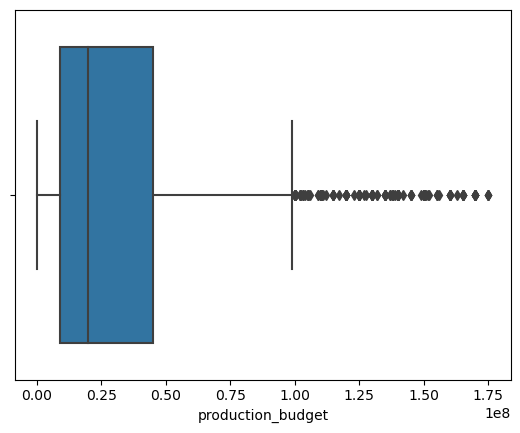

In [21]:
# Create a boxplot for movie budget 

sns.boxplot(x='production_budget', data=movies)

plt.show()
plt.close()


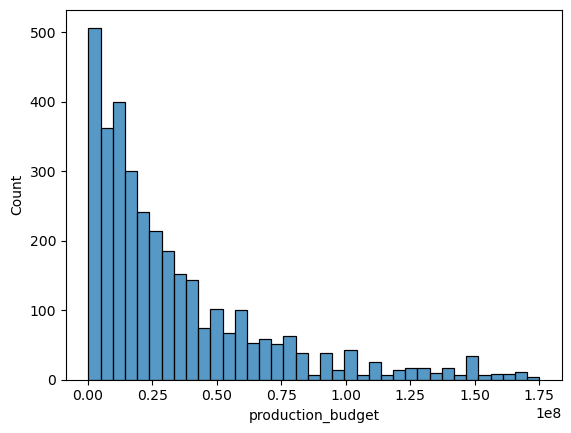

In [22]:
# Create a histogram for movie budget

sns.histplot(x='production_budget', data=movies)

plt.show()
plt.close()


In [ ]:
# DATA SUMMARIES
# Value Counts for Categorical Data
# 4 min
# When it comes to categorical variables, the measures of central tendency and spread that worked for describing numeric variables, like mean and standard deviation, generally becomes unsuitable when we’re dealing with discrete values. Unlike numbers, categorical values are not continuous and oftentimes do not have an intrinsic ordering.

# Instead, a good way to summarize categorical variables is to generate a frequency table containing the count of each distinct value. For example, we may be interested to know how many of the New York City rental listings are from each borough. Related, we can also find which borough has the most listings.

# The pandas library offers the .value_counts() method for generating the counts of all values in a DataFrame column:

# # Counts of rental listings in each borough
# df.borough.value_counts()

# Output:

# Manhattan    3539
# Brooklyn     1013
# Queens        448
# By default, it returns the results sorted in descending order by count, where the top element is the mode, or the most frequently appearing value. In this case, the mode is Manhattan with 3,539 rental listings.

# Instructions
# Checkpoint 1 Enabled
# 1.
# Using the movies DataFrame, find the number of movies in each genre and save the counts to a variable called genre_counts. Print genre_counts to see the result.

# Community Forums
# Still have questions? View this exercise's thread in the Codecademy Forums.
# Code Editor


# 1234567
# import pandas as pd

# movies = pd.read_csv('movies.csv')

# # Save the counts to genre_counts


# Run


# Output-only Terminal
# Output:
 


In [27]:
movies
# Save the counts to genre_counts

genre_counts = movies.genre.value_counts()

In [28]:
genre_counts

genre
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: count, dtype: int64

In [ ]:
# DATA SUMMARIES
# Value Proportions for Categorical Data
# 3 min
# A counts table is one approach for exploring categorical variables, but sometimes it is useful to also look at the proportion of values in each category. For example, knowing that there are 3,539 rental listings in Manhattan is hard to interpret without any context about the counts in the other categories. On the other hand, knowing that Manhattan listings make up 71% of all New York City listings tells us a lot more about the relative frequency of this category.

# We can calculate the proportion for each category by dividing its count by the total number of values for that variable:

# # Proportions of rental listings in each borough
# rentals.borough.value_counts() / len(rentals.borough)

# Output:

# Manhattan    0.7078
# Brooklyn     0.2026
# Queens       0.0896
# Alternatively, we could also obtain the proportions by specifying normalize=True to the .value_counts() method:

# df.borough.value_counts(normalize=True)

# Instructions
# Checkpoint 1 Enabled
# 1.
# Using the movies DataFrame, find the proportion of movies in each genre and save them to a variable called genre_props. Print genre_props to see the result.

# Community Forums
# Still have questions? View this exercise's thread in the Codecademy Forums.

In [35]:
#movies.genre
#movies.genre.value_counts(normalize=True)
genre_props = movies.genre.value_counts() / len(movies.genre)

In [ ]:
# DATA SUMMARIES
# Visualizing Categorical Variables
# 5 min
# For categorical variables, bar charts and pie charts are common options for visualizing the count (or proportion) of values in each category. They can also convey the relative frequencies of each category.

# Python’s seaborn library offers several functions that can create bar charts. The simplest for plotting the counts is countplot():

# # Bar chart for borough
# sns.countplot(x='borough', data=rentals)
# plt.show()
# plt.close()

# Bar chart of borough

# There are currently no functions in the seaborn library for creating a pie chart, but the pandas library provides a convenient wrapper function around matplotlib‘s pie() function that can generate a pie chart from any column in a DataFrame:

# # Pie chart for borough
# rentals.borough.value_counts().plot.pie()
# plt.show()
# plt.close()

# Pie chart of borough

# In general, many data analysts avoid pie charts because people are better at visually comparing areas of rectangles than wedges of a pie. For a variable with a small number of categories (i.e., fewer than three), a pie chart is a reasonable choice; however, for more complex data, a bar chart is usually preferable.

# Instructions
# Checkpoint 1 Enabled
# 1.
# Using the movies DataFrame, create a bar chart for genre using the countplot() function from seaborn. Don’t forget to display the plot using plt.show() and close the plot using plt.close().

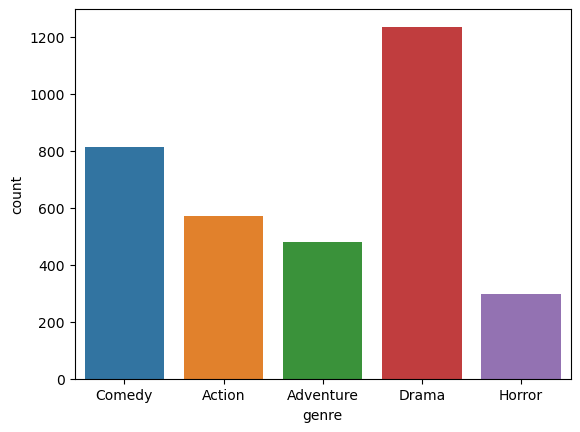

In [44]:
# Create a bar chart for movie genre 

import seaborn as sb

#movies.genre.countplot()

sb.countplot(data=movies, x='genre')

plt.show()

plt.close()

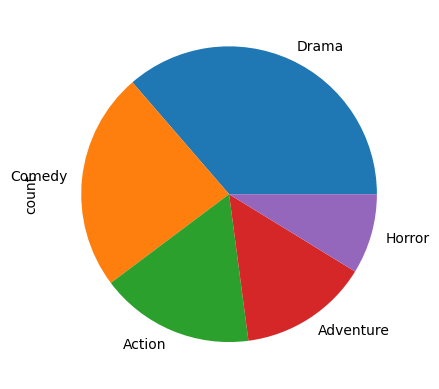

In [50]:
# Create a pie chart for movie genre

#pd.pie(movies)

movies.genre.value_counts().plot.pie()

plt.show()

plt.close()